In [186]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [138]:
data=pd.read_csv(r"https://raw.githubusercontent.com/hackrx40/PS7-Github_Architects/main/ML/data/competition.csv?token=GHSAT0AAAAAACEJGY66JJ7KSJKXEVPMMCWEZF2OO6A")

HTTPError: HTTP Error 404: Not Found

In [139]:
data

,Lang,Text,label
0,en,rt iciciprulife yorker doosra bouncer surya ku...,icici
1,en,rt cognizantnews cognizant tie max life insura...,max
2,en,hibah takaful sun life insurance wasiat faraid...,tata
3,en,niva bupa niva bupa finally rejected claim sur...,max
4,en,hdfc life insurance posted net profit r crore ...,hdfc
...,...,...,...
574,en,sbilife ashamed penalising year old man keepin...,sbi
575,en,singhumesh understand concern kindly note sbi ...,sbi
576,en,ammaradzim got similiar call person claimed pu...,tata
577,en,iciciprulife extremely dissatisfied service pr...,icici


In [140]:
data["label"].value_counts()

tata     180
sbi      153
hdfc      82
icici     70
max       64
xl        30
Name: label, dtype: int64

In [141]:
data_tata=data[data["label"]=="tata"]
data_sbi=data[data["label"]=="sbi"]
data_hdfc=data[data["label"]=="hdfc"]
data_icici=data[data["label"]=="icici"]
data_max=data[data["label"]=="max"]
data_xl=data[data["label"]=="xl"]

In [157]:
def intent(s):
    s=[s]
    intent_model=pkl.load(open('intent_classification.pkl','rb'))
    intent_tfidf=pkl.load(open('intent_classification_tfidf.pkl','rb'))
    d=intent_model.predict(intent_tfidf.transform(s))
    if d[0][0]==1:
        return "enquiry"
    elif d[0][1]==1:
        return "general talk"
    else:
        return "complaint"

In [161]:
def insurance(s):
    insurance_model=pkl.load(open('insurance-classification_model.pkl','rb'))
    insurance_tfidf=pkl.load(open('insurance_classification_tfidf.pkl','rb'))
    d=insurance_model.predict(insurance_tfidf.transform([s]))
    if d[0][0]==1:
        return "home"
    elif d[0][1]==1:
        return "life"
    elif d[0][2]==1:
        return "motor"
    elif d[0][3]==1:
        return "travel"
    else:
        return "health"

In [170]:
def service(s):
    service_model=pkl.load(open('service_model.pkl','rb'))
    service_tfidf=pkl.load(open('service_model_tfidf.pkl','rb'))
    d=service_model.predict(service_tfidf.transform([s]))
    if d[0][0]==1:
        return "emi"
    elif d[0][1]==1:
        return "insurance"
    elif d[0][2]==1:
        return "investment"
    elif d[0][3]==1:
        return "loan"
    elif d[0][4]==1:
        return "savings"
    else:
        return "card"

In [177]:
def sentiment(s):
    sentiment_model=pkl.load(open('tweet_clf.pkl','rb'))
    sentiment_tfidf=pkl.load(open('tweet_tfidf.pkl','rb'))
    d=sentiment_model.predict(sentiment_tfidf.transform([s]))
    if d[0]==1:
        return "positive"
    else:
        return "negative"

In [255]:
data_tata["sentiment"]=data_tata["Text"].apply(lambda x: sentiment(x))
data_tata["intent"]=data_tata["Text"].apply(lambda x: intent(x))
data_tata["service"]=data_tata["Text"].apply(lambda x: service(x))
data_tata["insurance"]=data_tata["Text"].apply(lambda x: insurance(x))

In [256]:
data_sbi["sentiment"]=data_sbi["Text"].apply(lambda x: sentiment(x))
data_sbi["intent"]=data_sbi["Text"].apply(lambda x: intent(x))
data_sbi["service"]=data_sbi["Text"].apply(lambda x: service(x))
data_sbi["insurance"]=data_sbi["Text"].apply(lambda x: insurance(x))

In [257]:
data_max["sentiment"]=data_max["Text"].apply(lambda x: sentiment(x))
data_max["intent"]=data_max["Text"].apply(lambda x: intent(x))
data_max["service"]=data_max["Text"].apply(lambda x: service(x))
data_max["insurance"]=data_max["Text"].apply(lambda x: insurance(x))

In [258]:
data_icici["sentiment"]=data_icici["Text"].apply(lambda x: sentiment(x))
data_icici["intent"]=data_icici["Text"].apply(lambda x: intent(x))
data_icici["service"]=data_icici["Text"].apply(lambda x: service(x))
data_icici["insurance"]=data_icici["Text"].apply(lambda x: insurance(x))

In [259]:
data_hdfc["sentiment"]=data_hdfc["Text"].apply(lambda x: sentiment(x))
data_hdfc["intent"]=data_hdfc["Text"].apply(lambda x: intent(x))
data_hdfc["service"]=data_hdfc["Text"].apply(lambda x: service(x))
data_hdfc["insurance"]=data_hdfc["Text"].apply(lambda x: insurance(x))

In [260]:
data_xl["sentiment"]=data_xl["Text"].apply(lambda x: sentiment(x))
data_xl["intent"]=data_xl["Text"].apply(lambda x: intent(x))
data_xl["service"]=data_xl["Text"].apply(lambda x: service(x))
data_xl["insurance"]=data_xl["Text"].apply(lambda x: insurance(x))

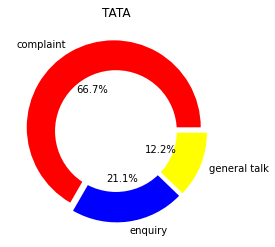

In [205]:
Salary = data_tata["intent"].value_counts()
colors = ['#FF0000', '#0000FF', '#FFFF00']
explode = (0.05, 0.05, 0.05)
plt.pie(Salary, colors=colors, labels=data_tata["intent"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.5,
        explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("TATA")
plt.show()

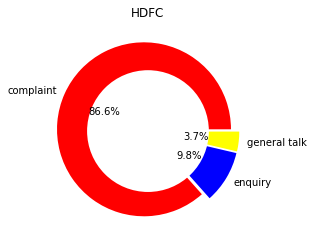

In [211]:
Salary = data_hdfc["intent"].value_counts()
colors = ['#FF0000', '#0000FF', '#FFFF00']
explode = (0.05, 0.05, 0.05)
plt.pie(Salary, colors=colors, labels=data_hdfc["intent"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.5,
        explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("HDFC")
plt.show()

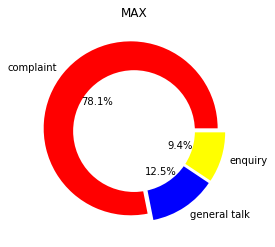

In [207]:
Salary = data_max["intent"].value_counts()
colors = ['#FF0000', '#0000FF', '#FFFF00']
explode = (0.05, 0.05, 0.05)
plt.pie(Salary, colors=colors, labels=data_max["intent"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.5,
        explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("MAX")
plt.show()

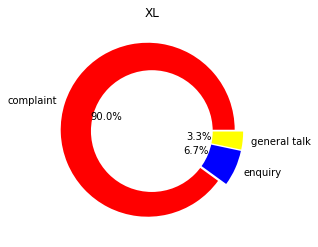

In [208]:
Salary = data_xl["intent"].value_counts()
colors = ['#FF0000', '#0000FF', '#FFFF00']
explode = (0.05, 0.05, 0.05)
plt.pie(Salary, colors=colors, labels=data_xl["intent"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.5,
        explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("XL")
plt.show()

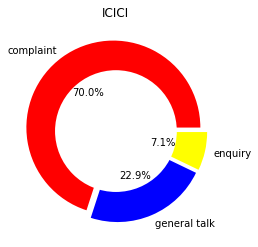

In [209]:
Salary = data_icici["intent"].value_counts()
colors = ['#FF0000', '#0000FF', '#FFFF00']
explode = (0.05, 0.05, 0.05)
plt.pie(Salary, colors=colors, labels=data_icici["intent"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.5,
        explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("ICICI")
plt.show()

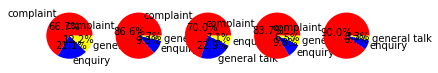

<Figure size 1152x1152 with 0 Axes>

In [245]:

fig1,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5)
plt.figure(figsize=(16,16))
Salary = data_tata["intent"].value_counts()
colors = ['#FF0000', '#0000FF', '#FFFF00']
ax1.pie(Salary, colors=colors, labels=data_tata["intent"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
Salary = data_hdfc["intent"].value_counts()
colors = ['#FF0000', '#0000FF', '#FFFF00']
ax2.pie(Salary, colors=colors, labels=data_hdfc["intent"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
Salary = data_icici["intent"].value_counts()
colors = ['#FF0000', '#0000FF', '#FFFF00']
ax3.pie(Salary, colors=colors, labels=data_icici["intent"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
Salary = data_sbi["intent"].value_counts()
colors = ['#FF0000', '#0000FF', '#FFFF00']
ax4.pie(Salary, colors=colors, labels=data_sbi["intent"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
Salary = data_xl["intent"].value_counts()
colors = ['#FF0000', '#0000FF', '#FFFF00']
ax5.pie(Salary, colors=colors, labels=data_xl["intent"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
plt.show()

## Insurance

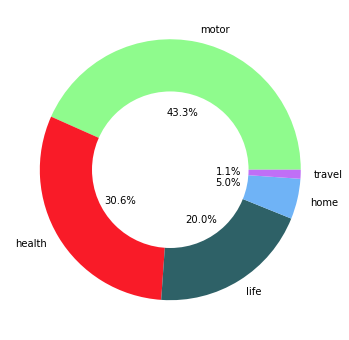

In [262]:
plt.figure(figsize=(6,6))
data_tata["insurance"].value_counts()
Salary = data_tata["insurance"].value_counts()
colors = ['#8ffb8d', '#f91b28',"#2e6167","#6fb3f6","#c06ff6","#6ff6f3"]
plt.pie(Salary, colors=colors, labels=data_tata["insurance"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.show()

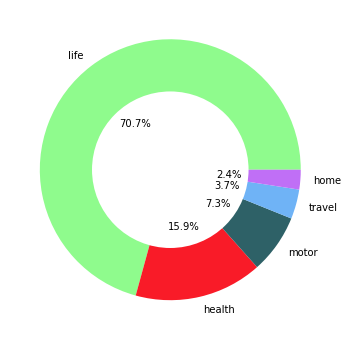

In [265]:
plt.figure(figsize=(6,6))
data_hdfc["insurance"].value_counts()
Salary = data_hdfc["insurance"].value_counts()
colors = ['#8ffb8d', '#f91b28',"#2e6167","#6fb3f6","#c06ff6","#6ff6f3"]
plt.pie(Salary, colors=colors, labels=data_hdfc["insurance"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.show()

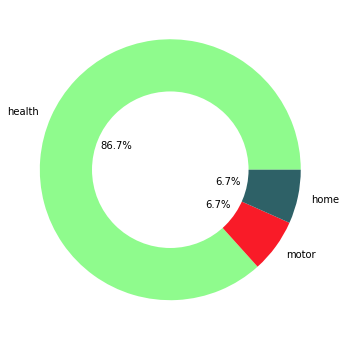

In [266]:
plt.figure(figsize=(6,6))
data_xl["insurance"].value_counts()
Salary = data_xl["insurance"].value_counts()
colors = ['#8ffb8d', '#f91b28',"#2e6167","#6fb3f6","#c06ff6","#6ff6f3"]
plt.pie(Salary, colors=colors, labels=data_xl["insurance"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.show()

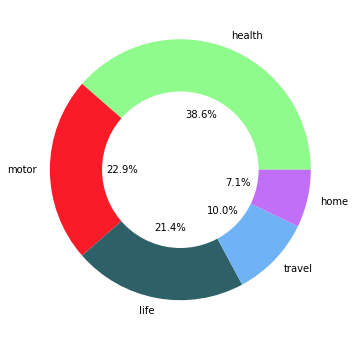

In [267]:
plt.figure(figsize=(6,6))
data_icici["insurance"].value_counts()
Salary = data_icici["insurance"].value_counts()
colors = ['#8ffb8d', '#f91b28',"#2e6167","#6fb3f6","#c06ff6","#6ff6f3"]
plt.pie(Salary, colors=colors, labels=data_icici["insurance"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.show()

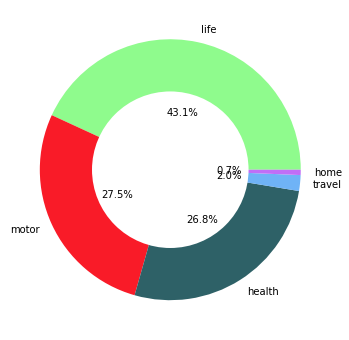

In [272]:
plt.figure(figsize=(6,6))
data_sbi["insurance"].value_counts()
Salary = data_sbi["insurance"].value_counts()
colors = ['#8ffb8d', '#f91b28',"#2e6167","#6fb3f6","#c06ff6","#6ff6f3"]
plt.pie(Salary, colors=colors, labels=data_sbi["insurance"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.show()

## sentiment CHART

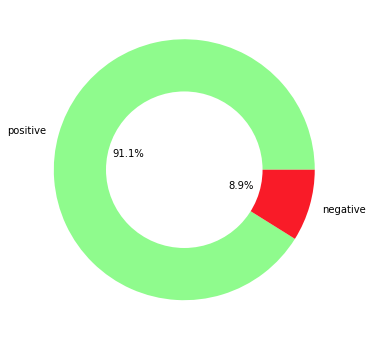

In [274]:
plt.figure(figsize=(6,6))
data_tata["sentiment"].value_counts()
Salary = data_tata["sentiment"].value_counts()
colors = ['#8ffb8d', '#f91b28',"#2e6167","#6fb3f6","#c06ff6","#6ff6f3"]
plt.pie(Salary, colors=colors, labels=data_tata["sentiment"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.show()

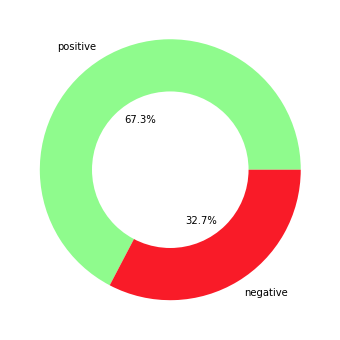

In [275]:
plt.figure(figsize=(6,6))
data_sbi["sentiment"].value_counts()
Salary = data_sbi["sentiment"].value_counts()
colors = ['#8ffb8d', '#f91b28',"#2e6167","#6fb3f6","#c06ff6","#6ff6f3"]
plt.pie(Salary, colors=colors, labels=data_sbi["sentiment"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.show()

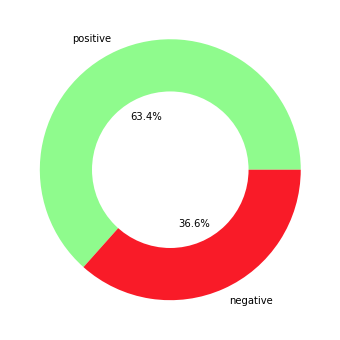

In [276]:
plt.figure(figsize=(6,6))
data_hdfc["sentiment"].value_counts()
Salary = data_hdfc["sentiment"].value_counts()
colors = ['#8ffb8d', '#f91b28',"#2e6167","#6fb3f6","#c06ff6","#6ff6f3"]
plt.pie(Salary, colors=colors, labels=data_hdfc["sentiment"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.show()

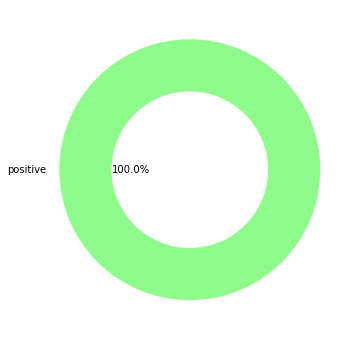

In [277]:
plt.figure(figsize=(6,6))
data_xl["sentiment"].value_counts()
Salary = data_xl["sentiment"].value_counts()
colors = ['#8ffb8d', '#f91b28',"#2e6167","#6fb3f6","#c06ff6","#6ff6f3"]
plt.pie(Salary, colors=colors, labels=data_xl["sentiment"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.show()

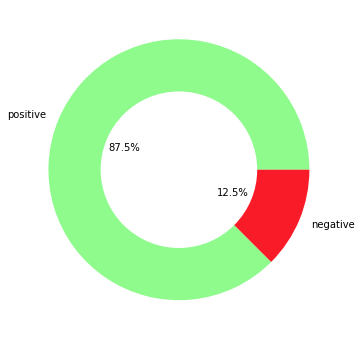

In [278]:
plt.figure(figsize=(6,6))
data_max["sentiment"].value_counts()
Salary = data_max["sentiment"].value_counts()
colors = ['#8ffb8d', '#f91b28',"#2e6167","#6fb3f6","#c06ff6","#6ff6f3"]
plt.pie(Salary, colors=colors, labels=data_max["sentiment"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.show()

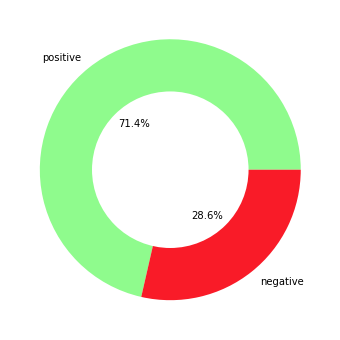

In [279]:
plt.figure(figsize=(6,6))
data_icici["sentiment"].value_counts()
Salary = data_icici["sentiment"].value_counts()
colors = ['#8ffb8d', '#f91b28',"#2e6167","#6fb3f6","#c06ff6","#6ff6f3"]
plt.pie(Salary, colors=colors, labels=data_icici["sentiment"].value_counts().index,
        autopct='%1.1f%%', pctdistance=0.45)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.show()